In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
train_data_path = '../data/train.csv'
test_data_path = '../data/test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

print(train_data.info())
print(test_data.info())


# 缺失值：
#   - train_data: age,cabin,embarked
#   - test_data: age, fare, cabin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

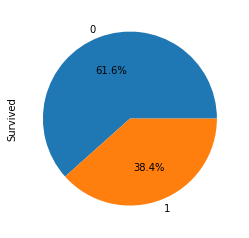

In [4]:
# 1. Survived : 存活比例
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

# conclusion：
# 不幸的人多于幸运的人


In [88]:
# 2. Sex VS Survived : 性别与生存的关系
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

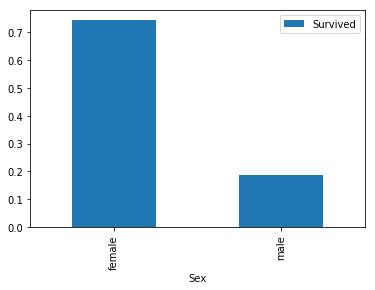

In [90]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()


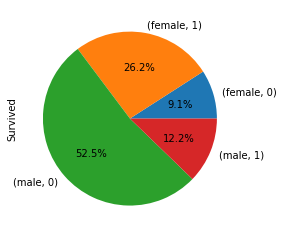

In [39]:
train_data.groupby(['Sex','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%')

# conclusion：
# 男性多于女性，幸存的男性却少于幸存的女性，女性中幸存的人较多，男性中幸存的人较少；
# 女性更容易在灾难中存活下来；


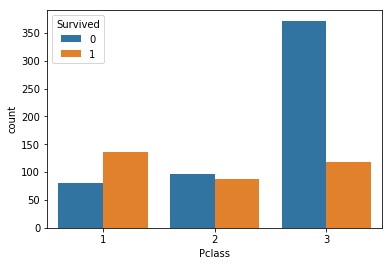

In [92]:
# 3. Pclass VS Survived : 船舱等级与生存的关系
# train_data.groupby(['Pclass','Survived'])['Survived'].count()
sns.countplot('Pclass',hue='Survived',data=train_data)

# conclusion：
# 船舱等级越高，幸存的概率越大；


In [44]:
# 4. Pclass Sex VS Survived : 船舱等级、性别与生存的关系
# train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count()
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

# conclusion：
# 同一船舱等级的乘客中，女性幸存的概率较大；


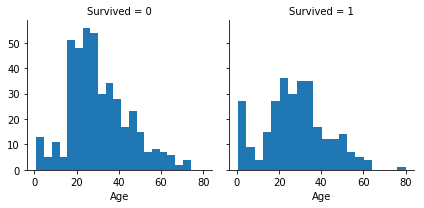

In [76]:
# 5. Age VS Survived : 年龄与生存的关系
# train_data.groupby(['Age','Survived'])['Survived'].count()
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# FacetGrid ： 画出轮廓； map ： 填充内容
# hist：直方图； scatter：散点图； barplot：条形图；



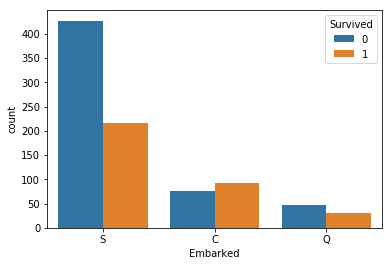

In [45]:
# 6. Embarked VS Survived : 登陆港口与生存的关系
train_data.groupby(['Embarked','Survived'])['Survived'].count()
sns.countplot('Embarked',hue='Survived',data=train_data)

# 计数直方图，通过hue参数指定分类别的显示


Text(0.5, 1.0, 'Parch ')

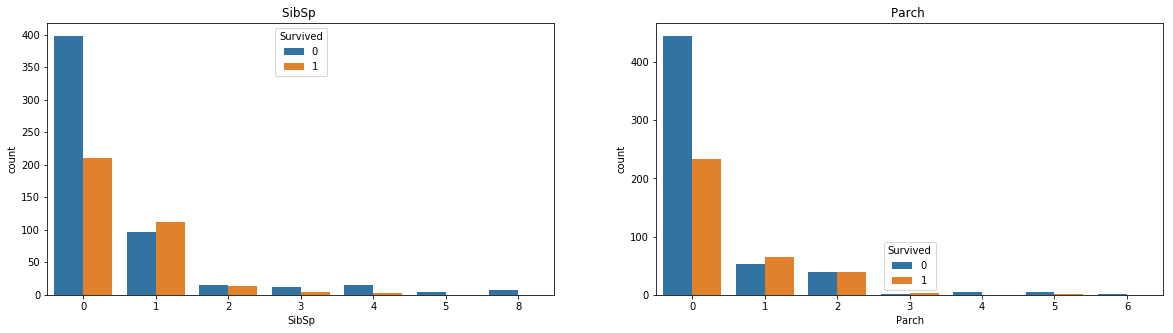

In [46]:
# 7. SibSp Parch VS Survived : 船上亲友数与生存的关系
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='SibSp', hue='Survived', data=train_data, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=train_data, ax=ax2)
ax1.set_title('SibSp ')
ax2.set_title('Parch ') 

# conclusion：
# 孤身一人的存活率较低，但亲友太多也不容易活下来


In [87]:
# 8. Corr matrix : 协方差矩阵，了解各字段之间的相关性
# f, ax1 = plt.subplots(1, 1, figsize=(20, 5))
train_corr = train_data.corr()
train_corr
a = sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True )
# f.savefig('heatmap.jpg')
# vmin=-1, vmax=1：数轴上显示的最大值最小值
# annot=True：在方格里显示数字 
# cbar=False：不绘制颜色条 

 